# Practice 2: Diffraction by simple openings

## 1. Objectives of the practice

   - Observation of the diffraction diagram by a rectangular opening and by another circular
   - Obtaining the size of the slit and the circular opening
   - Visualization of the diffraction pattern of a double slit

    
## 2. Theoretical basis

** Fraunhofer Diffraction **

Diffraction is the tendency of every wave to depart from straight propagation as it propagates or passes through an opening or obstacle.
This effect is basically the result of interferential processes and therefore is intimately related to the wave nature of light.
For its study we are going to make use of the Huygens-Fresnel Principle,it is necessary to emphasize that it is an approximation.
For a complete treatment of diffraction we must turn to Maxwell's equations. However, the use of the Huygens-Fresnel principle will give us
more than enough results. Said principle says the following:
    
Each point of the wavefront can be assumed as a secondary emitter center of spherical waves. The total disturbance that reaches another point
Subsequent is the result of the interference of all those secondary waves.





### 2.1 Diffraction through a slit

Due to the effect of diffraction the irradiance at a point on an observation plane in the Fraunhofer region is given by:
    
  $$ I (\beta) = I_0 \frac{\sin^ 2 (\beta)} {\beta ^ 2} $$ (1)

where beta is defined as:
    
  $$ \beta = \frac{\pi b \sin (\theta)} {\lambda} $$ (2)

b being the width of the aperture and theta the angle subtended by the observation point with respect to the axis normal to the plane of the slit. In these
conditions have that D >> x so $ \sin (\theta) ≈ tan (\theta) ≈ x / D $. Therefore the expression of $\beta$ given by equation (2) can
Approach to:
           
  $$ \beta = \frac{\pi b x} {\lambda D} $$ (3)
    
where x is the distance from the point considered to the Y axis.
In this way, diffraction minima will be obtained when $ I (\beta) = 0 $. This occurs in those positions where $ \beta $ is a whole multiple
of $ \pi: \beta = m \pi $, with m = ± 1, ± 2, ... since in the case of m = 0 there is a maximum called the diffraction central maximum.
Taking into account the minimum condition and the $\beta$ equation, the position of the minimum order m is given by:
        
  $$ x_m = \frac{\lambda D} {b} m $$ (4)

(A) Schematic diagram of the experimental setup for the simple slit

(B) Radiation profile on the screen

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fft2, ifft, ifft2, fftshift, fftfreq
from scipy.signal import square
#% matplotlib inline
% matplotlib notebook

## Parameters

a = 1e-4 # Slit size
Lambda = 632.8e-9 # He-Ne laser wavelength
z = 3 #Distance to the wall in meters
x, y = np.mgrid [-1e-3: 1e-3: 1e-5, -1e-3: 1e-3: 1e-5]
slit = np.abs (x) <a / 2 # Definition of slit function

#Fourier transform
tfrendija = fftshift (fft2 (slit))
hx = 1e-5
hy = 1e-5

frecx = np.arange (-0.5,0.5,1 / slit.shape [0]) * (1 / hx)
frecy = np.arange (-0.5,0.5,1. / slit.shape [1]) * (1 / hy)

xnew = (Lambda * z * frecx) # New variables in the plane where diffraction is observed
ynew = (Lambda * z * frecy)
irradiance = np.abs (tfrendija) .T ** 2 # Irradiance observed

fig1, ax = plt.subplots (1,2, figsize = (18,6))
ax [0] .pcolormesh (xnew * 100, ynew * 100, irradiance, cmap = 'hot') # since we want the result in cm
ax [0] .set_ylim (-0.01,0.11)
ax [0] .set_title ("Irradiance")

# Representation of a section along the X axis
cut = irradiance [100 ,:]
ax [1] .plot (xnew * 1e2, cut / cut.max ())
ax [1] .set_xlabel ('Position (cm)')
ax [1] .set_ylim (0,1)
ax [1] .set_ylabel ('Irradiance (u.a.)')
ax [1] .set_title ("Irradiance profile")

Text(0.5,1,'Irradiance profile')

As we see in equation (4) there is a linear relationship between the position $ x_m $ in which the minimum diffraction of order m is located and the order
diffraction m. For example, the distance between the minimum of order -2 and that of order 3 is given by:
    
   $$ x_3 - x_2 = \frac {\lambda D} {b} (3 - (- 2)) = \frac {5 \lambda D} {b} $$ (5)

We will use this relationship to estimate the width value of the problem slit if all other parameters are known.

### Exercise 1

* Obtain the size of the slit $ b $ from the difference in the two minimum positions, which can be measured in the irradiance profile shown in the figure on the right. To do this, use the parameters of wavelength and working distance of the code shown above.

### 2.2 Diffraction through a circular aperture

When striking a beam of light over a circular aperture, the diffraction pattern that is observed consists of a series of circular stripes
concentric The phenomenon is similar to that of a slit, in fact we could consider the circular opening as a collection of slits of
variable length that fill all the opening. At a given point on the screen the resulting irradiance is obtained by the coherent sum of
the contributions of each of the elementary slits. This results in the expression of the irradiance being slightly different from the
expression (1) and is given by:

   $$ I (\theta) = I (0) \left (\frac {2 J_1 \left (ka \sin \left (\theta \right) \right)} {ka \sin (\theta)} \right) ^ 2 $$ (6)

where a is the radius of the circular opening, $ \theta $ the angular position of the observation point on the screen relative to the center of the aperture and
$ k = 2 \pi / \lambda $ is the number of waves. In the expression (6) $ J_1 $ represents the Bessel function of first class of order 1. The expression (6) is called the figure of Airy.

(A) Diffraction diagram of a circular aperture

(B) Representation of the intensity along line AB of the figure of Airy, normalized to its maximum value

Text(0,0.5,'Irradiance (u.a.)')

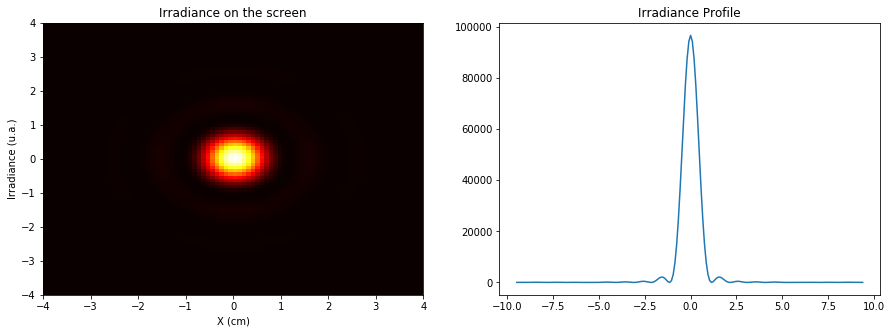

In [3]:
R0 = 1e-4 #Radio of the opening
r = np.sqrt (x ** 2 + y ** 2)
circular = r <R0

#Fourier transform
tfcirc = fftshift (fft2 (circular))
irradiance = np.abs (tfcirc) .T ** 2

fig2, ax = plt.subplots (1,2, figsize = (15,5))
ax [0] .pcolormesh (xnew * 100, ynew * 100, irradiance, cmap = 'hot') # since we want the result in cm
ax [0] .set_xlim (-4,4)
ax [0] .set_ylim (-4,4)
ax [0] .set_title ("Irradiance on the screen")
ax [0] .set_xlabel ('X (cm)')
ax [0] .set_ylabel ('Y (cm)')

# Irradiance profile along the X axis
cut = irradiance [100 ,:]
ax [1] .plot (xnew * 100, cut)
ax [1] .set_title ("Irradiance Profile")
ax [0] .set_xlabel ('X (cm)')
ax [0] .set_ylabel ('Irradiance (u.a.)')

Figure 2 shows the distribution of irradiance produced by a circular opening together with the graph of equation (6). The first minimum
Irradiance (first dark ring) is obtained when:
    
$$ k a \sin (\theta) = 3.83 $$ (7)
    
If the distance from the opening to the observation screen is considerably greater than the radius of the first dark ring, we can approximate
the equation (7) the sine by the angle. In this way the angle subtended by the first dark ring is given by:
    
$$ \theta ≈ \frac {3.83} {\pi} \frac {\lambda} {2a} = 1.22 \frac {\lambda} {D_a} $$ (8)

where $ D_a $ = 2a is the diameter of the circular opening. The radius of the first dark ring will be:
    
$$ r_1 = 1.22 \frac {\lambda D} {D_a} $$ (9)

### Exercise 2

* Obtain the diameter of the circular opening $ D_a $ using the previous figures and the equation deduced to determine the position of the first minimum of the diffraction pattern

### 2.3 Double Slit

Text(0,0.5,'Irradiance (u.a.)')

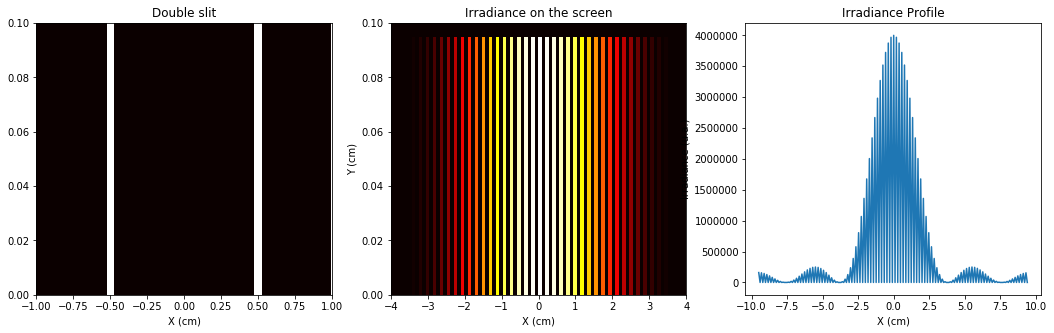

In [7]:
width_slit = 0.5e-4
distance_slits = 5e-4
doubleslit = np.abs (x-distance_slits) <width_slit / 2 # Definition of the slit function
doubleslit += np.abs (x + distance_slits) <width_slit / 2

#Fourier transform
tfdoble = fftshift (fft2 (doubleslit))
irradiance = np.abs (tfdoble) .T ** 2

fig3, ax = plt.subplots (1,3, figsize = (18,5))

ax [0] .pcolormesh (x * 1000, y * 1000, doubleslit, cmap = 'hot') # to come out in cm
ax [0] .set_xlim (-1,1)
ax [0] .set_ylim (-0,0.1)
ax [0] .set_title ("Double slit")
ax [0] .set_xlabel ('X (cm)')


ax [1] .pcolormesh (xnew * 100, ynew * 100, irradiance, cmap = 'hot') # to come out in cm
ax [1] .set_xlim (-4,4)
ax [1] .set_ylim (-0,0.1)
ax [1] .set_title ("Irradiance on the screen")
ax [1] .set_xlabel ('X (cm)')
ax [1] .set_ylabel ('Y (cm)')

# Irradiance profile along the X axis
cut = irradiance [100 ,:]
ax [2] .plot (xnew * 100, cut)
ax [2] .set_title ("Irradiance Profile")
ax [2] .set_xlabel ('X (cm)')
ax [2] .set_ylabel ('Irradiance (u.a.)')

### Exercise 3

* Vary the parameters $ width_ {slit} $ and $ distance_ {slits} $ in the previous code and explain the changes observed in the irradiance on the screen.